In [14]:
import pandas as pd
import requests
from urllib.parse import urlencode
import seaborn as sns
import scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
path = 'https://disk.yandex.ru/d/c4t6B6OFDANVbg'

In [16]:
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [17]:
# подготовка ссылок для загрузки в датафреймы
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=path))
response = requests.get(final_url)
download_url = response.json()['href']

In [31]:
df = pd.read_csv(download_url, parse_dates=['timestamp'])

In [32]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [97]:
df.sort_values('timestamp').loc[(df.timestamp >='2016-09-01 00:00:00')].head(30)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
14453,2016-09-01 00:00:00,322,18.0,18.0,68.0,15.0,1.0,0.0,0.0,2.0
14454,2016-09-01 01:00:00,186,17.0,17.0,73.0,16.0,1.0,0.0,0.0,2.0
14455,2016-09-01 02:00:00,89,16.5,16.5,75.0,16.0,1.0,0.0,0.0,2.0
14456,2016-09-01 03:00:00,56,16.0,16.0,74.5,11.0,2.0,0.0,0.0,2.0
14457,2016-09-01 04:00:00,64,16.0,16.0,77.0,12.0,2.0,0.0,0.0,2.0
14458,2016-09-01 05:00:00,133,15.0,15.0,82.0,11.0,2.0,0.0,0.0,2.0
14459,2016-09-01 06:00:00,811,15.0,15.0,82.0,12.0,2.0,0.0,0.0,2.0
14460,2016-09-01 07:00:00,2663,16.0,16.0,77.0,11.0,2.0,0.0,0.0,2.0
14461,2016-09-01 08:00:00,4631,16.5,16.5,75.0,9.0,2.0,0.0,0.0,2.0
14462,2016-09-01 09:00:00,2365,18.0,18.0,68.0,6.5,2.0,0.0,0.0,2.0


In [34]:
df.shape

(17414, 10)

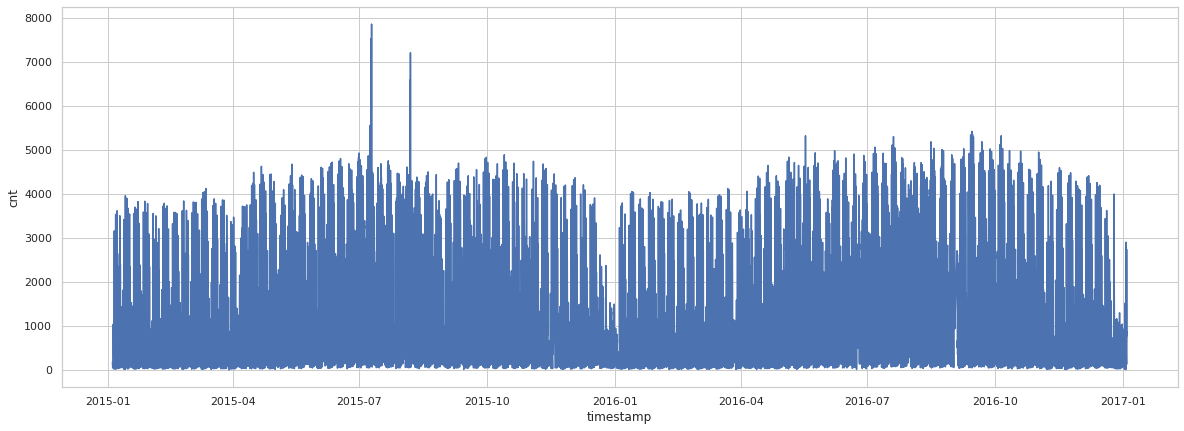

In [36]:
sns.lineplot(data=df, x='timestamp', y='cnt')

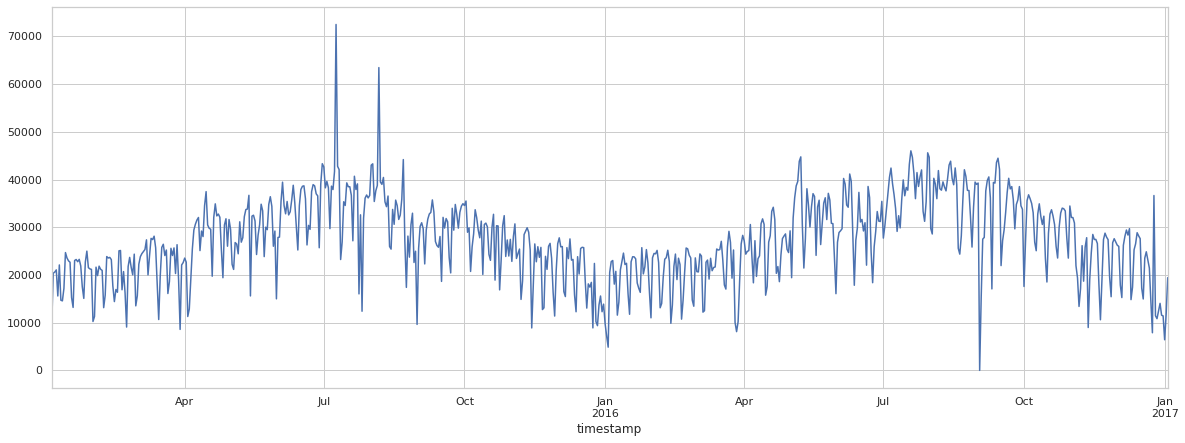

In [44]:
# сортируем по дате
# заводим дату в индекс
# перегруппируем по дням сумму аренд
# выводим на график
df.sort_values('timestamp') \
.set_index(df.timestamp) \
.resample(rule='D').cnt.sum() \
.plot()

In [65]:
df_agg = df.sort_values('timestamp') \
.set_index(df.timestamp) \
.resample(rule='D').cnt.sum()

In [66]:
df_agg

timestamp
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
              ...  
2016-12-30    11566
2016-12-31    11424
2017-01-01     6421
2017-01-02    11823
2017-01-03    19436
Freq: D, Name: cnt, Length: 731, dtype: int64

In [67]:
df_agg = df_agg.reset_index()
df_agg

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
726,2016-12-30,11566
727,2016-12-31,11424
728,2017-01-01,6421
729,2017-01-02,11823


In [69]:
df_agg['rolling3'] = df_agg.cnt.rolling(3).mean()

In [72]:
df_agg.loc[df_agg.timestamp=='2015-07-09']

,timestamp,cnt,rolling3
186,2015-07-09,72504,50705.0


In [82]:
std = np.std(df_agg.cnt - df_agg.rolling3)

In [83]:
df_agg['upper_bound'] = df_agg.rolling3 + 2.576 * std
df_agg['lower_bound'] = df_agg.rolling3 - 2.576 * std

In [84]:
df_agg

,timestamp,cnt,rolling3,upper_bound,lower_bound
0,2015-01-04,9234,NaN,NaN,NaN
1,2015-01-05,20372,NaN,NaN,NaN
2,2015-01-06,20613,16739.666667,28482.585854,4996.747479
3,2015-01-07,21064,20683.000000,32425.919188,8940.080812
4,2015-01-08,15601,19092.666667,30835.585854,7349.747479
...,...,...,...,...,...
726,2016-12-30,11566,12682.000000,24424.919188,939.080812
727,2016-12-31,11424,12347.333333,24090.252521,604.414146
728,2017-01-01,6421,9803.666667,21546.585854,-1939.252521
729,2017-01-02,11823,9889.333333,21632.252521,-1853.585854


In [85]:
df_agg.upper_bound.tail(1).round(2)

730    24302.92
Name: upper_bound, dtype: float64

In [86]:
df_agg.loc[(df_agg.cnt - df_agg.upper_bound) > 0]

,timestamp,cnt,rolling3,upper_bound,lower_bound
186,2015-07-09,72504,50705.000000,62447.919188,38962.080812
214,2015-08-06,63468,46627.333333,58370.252521,34884.414146
609,2016-09-04,27512,14259.000000,26001.919188,2516.080812
721,2016-12-25,36653,19650.666667,31393.585854,7907.747479


In [90]:
df_agg.loc[(df_agg.lower_bound - df_agg.cnt) > 0]

,timestamp,cnt,rolling3,upper_bound,lower_bound
130,2015-05-14,15609,28709.333333,40452.252521,16966.414146
189,2015-07-12,23240,36036.666667,47779.585854,24293.747479
201,2015-07-24,16034,31013.666667,42756.585854,19270.747479
232,2015-08-24,17400,29529.333333,41272.252521,17786.414146
314,2015-11-14,8898,21037.333333,32780.252521,9294.414146
607,2016-09-02,0,26086.333333,37829.252521,14343.414146
615,2016-09-10,17080,31262.000000,43004.919188,19519.080812
621,2016-09-16,21967,36193.333333,47936.252521,24450.414146
678,2016-11-12,8990,20878.000000,32620.919188,9135.080812
